# Project Model Sistem Rekomendasi: Rekomendasi Buku
- **Nama:** Sakti Mujahid Imani
- **Email:** mc119d5y2081@student.devacademy.id
- **ID Dicoding:** MC119D5Y2081

# 📚 Project Overview

Sistem rekomendasi telah menjadi bagian penting dalam berbagai platform digital, membantu pengguna menemukan konten yang relevan di tengah lautan informasi. Dalam proyek ini, saya membangun sistem rekomendasi buku menggunakan data dari Book-Crossing Dataset yang telah diproses. Dataset ini mencakup interaksi pengguna berupa rating terhadap berbagai buku, disertai metadata buku seperti judul dan penulis.

Proyek ini penting karena dapat menjadi solusi dalam mengatasi permasalahan overload informasi yang dialami pembaca atau pelanggan toko buku daring. Dengan rekomendasi yang personal dan relevan, pengguna dapat menemukan buku-buku baru yang sesuai dengan preferensi mereka, meningkatkan kepuasan pengguna sekaligus mendorong tingkat keterlibatan.

Menurut [Ricci et al., 2011](https://link.springer.com/book/10.1007/978-0-387-85820-3), sistem rekomendasi telah menjadi komponen vital dalam membantu pengguna melakukan pengambilan keputusan di tengah banyaknya pilihan yang tersedia. Proyek ini juga merujuk pada pentingnya pengalaman pengguna yang dipersonalisasi, sebagaimana dibahas dalam berbagai studi sistem rekomendasi berbasis konten dan kolaboratif.

Saya memilih topik ini karena sistem rekomendasi memiliki peran sentral dalam dunia e-commerce, edukasi, dan hiburan. Selain itu, pendekatan ini memungkinkan eksplorasi dua metode utama dalam sistem rekomendasi: **Content-Based Filtering** dan **Collaborative Filtering**, yang akan saya implementasikan dan bandingkan dalam proyek ini.


# 💼 Business Understanding

## 🎯 Problem Statements
1. Pengguna sering kesulitan menemukan buku yang sesuai dengan preferensi mereka di antara ribuan pilihan yang tersedia.
2. Sistem pencarian konvensional kurang mampu memberikan hasil yang bersifat personal dan kontekstual.
3. Banyak pengguna yang hanya membaca buku populer tanpa menjelajahi rekomendasi yang sesuai dengan minat mereka.

## 🥅 Goals
1. Membangun sistem rekomendasi yang mampu menyarankan buku kepada pengguna berdasarkan histori interaksi mereka.
2. Meningkatkan relevansi hasil rekomendasi agar pengguna menemukan buku yang sesuai dengan preferensi mereka secara otomatis.
3. Membandingkan dua pendekatan utama dalam sistem rekomendasi: Content-Based Filtering dan Collaborative Filtering.

## 🧠 Solution Approach
Untuk menyelesaikan masalah tersebut, proyek ini akan menggunakan dua pendekatan:

- **Content-Based Filtering**: sistem akan merekomendasikan buku berdasarkan kemiripan konten, seperti penulis atau judul buku yang pernah disukai oleh pengguna.
- **Collaborative Filtering**: sistem akan memanfaatkan pola interaksi antar pengguna dan buku, dengan asumsi bahwa pengguna yang menyukai buku serupa akan memiliki preferensi yang sama.

# 📊 Data Understanding

## ℹ️ Informasi Umum
Dataset yang digunakan dalam proyek ini adalah **Book-Crossing Dataset** dari Kaggle. Dataset ini terdiri dari dua file utama, yaitu `BX-Books.csv` (informasi metadata buku) dan `BX-Book-Ratings.csv` (data interaksi pengguna dengan buku). Kedua file telah digabung dan disimpan dalam satu file bernama `dataset.csv`.

- **Jumlah Data (mentah, sebelum pembersihan):** 1.031.173 baris  
- **Jumlah Pengguna Unik:** 92.107 pengguna  
- **Jumlah Buku Unik:** 270.168 judul buku  
- **Sumber Data:** [Kaggle - Book-Crossing Dataset](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset)

## ⚠️ Kondisi Awal Data
- Terdapat banyak entri dengan rating 0, yang menunjukkan tidak adanya feedback eksplisit.
- Sebagian pengguna hanya memberikan satu rating, menyebabkan data sangat sparse (jarang).
- Data masih mengandung duplikasi dan noise.
- Kolom metadata belum dinormalisasi (masih campuran huruf besar kecil, karakter spesial, dsb.).

## 🧾 Fitur pada Dataset
- `User-ID` → ID unik pengguna
- `ISBN` → ID unik buku
- `Book-Rating` → Nilai rating dari pengguna (skala 0–10, 0 berarti tidak memberikan rating eksplisit)
- `Book-Title` → Judul buku
- `Book-Author` → Penulis buku

## 📈 Visualisasi Awal (EDA)
Visualisasi awal dilakukan untuk memahami sebaran rating, distribusi pengguna dan buku, serta mengidentifikasi kebutuhan pembersihan data. EDA ini akan menjadi dasar dalam menentukan pendekatan yang tepat pada proses modeling.


Jumlah baris: 1031173
Jumlah user unik: 92107
Jumlah buku unik: 270168


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\4277107373.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=df, palette='viridis')


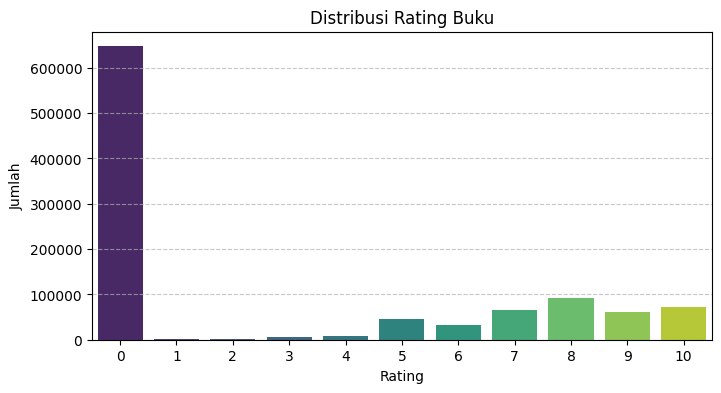

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9972\4277107373.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.values, y=top_books.index, palette='magma')


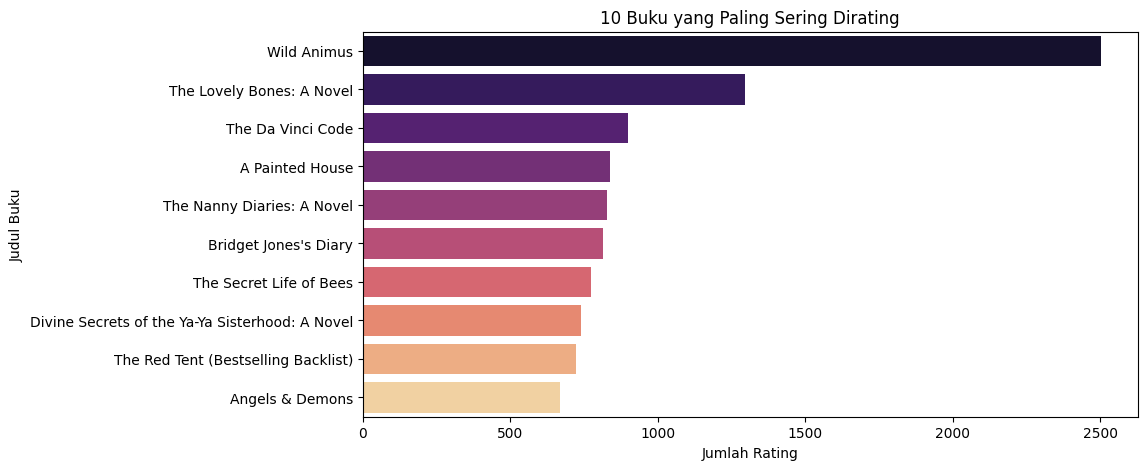

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dataset.csv")

print("Jumlah baris:", len(df))
print("Jumlah user unik:", df['User-ID'].nunique())
print("Jumlah buku unik:", df['ISBN'].nunique())

plt.figure(figsize=(8, 4))
sns.countplot(x='Book-Rating', data=df, palette='viridis')
plt.title("Distribusi Rating Buku")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top_books = df['Book-Title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_books.values, y=top_books.index, palette='magma')
plt.title("10 Buku yang Paling Sering Dirating")
plt.xlabel("Jumlah Rating")
plt.ylabel("Judul Buku")
plt.show()

# 📊 Penjelasan Proses EDA

Pada tahap ini, data dimuat ke dalam DataFrame dan dilakukan eksplorasi data awal (EDA).  
- Menampilkan jumlah baris, user unik, dan buku unik untuk memahami skala data.
- Visualisasi distribusi rating untuk melihat kecenderungan pengguna dalam memberi rating.
- Menampilkan 10 buku yang paling sering diberi rating untuk mengetahui buku populer di dataset.

Insight yang didapat:
- Sebagian besar rating berada di rentang tertentu (bisa dilihat pada grafik).
- Ada beberapa buku yang sangat populer seperti "Wild Animus" (sering diberi rating).

# 🧹 Data Preparation

Tahap data preparation dilakukan untuk meningkatkan kualitas data dan memastikan data yang digunakan sesuai untuk membangun model sistem rekomendasi. Data awal memiliki lebih dari satu juta baris, termasuk banyak nilai rating 0, duplikasi, serta entri yang tidak relevan.

Berikut adalah tahapan-tahapan data preparation yang diterapkan secara berurutan dalam proyek ini:

---

## 🔧 1. Menghapus rating dengan nilai 0  
**Proses:**  
Data dengan nilai `Book-Rating = 0` dihapus dari dataset karena tidak merepresentasikan preferensi yang jelas dari pengguna.

**Alasan:**  
Nilai rating 0 dianggap sebagai implicit feedback yang tidak bisa digunakan oleh algoritma rekomendasi berbasis rating eksplisit seperti Content-Based dan Collaborative Filtering.

---

## 🔧 2. Menghapus duplikasi rating  
**Proses:**  
Menghapus baris duplikat berdasarkan kombinasi `User-ID` dan `ISBN` agar setiap interaksi hanya dihitung sekali.

**Alasan:**  
Duplikasi dapat menyebabkan bias pada sistem rekomendasi, karena satu item bisa terlihat lebih penting dari yang sebenarnya.

---

## 🔧 3. Menormalisasi data teks  
**Proses:**  
Semua data pada kolom `Book-Title` dan `Book-Author` dikonversi ke huruf kecil (`lowercase`).

**Alasan:**  
Normalisasi teks penting dalam proses pencarian kemiripan string pada Content-Based Filtering agar perbandingan tidak sensitif terhadap kapitalisasi huruf.

---

## 🔧 4. Memilih pengguna aktif  
**Proses:**  
Hanya mengambil data dari 1.000 pengguna paling aktif (yang memberikan rating terbanyak).

**Alasan:**  
Pengguna pasif (yang hanya memberi 1–2 rating) menambah sparsity dan noise dalam model Collaborative Filtering. Dengan menyaring pengguna aktif, data menjadi lebih padat dan hasil rekomendasi menjadi lebih akurat.

---

Semua teknik di atas diterapkan secara **berurutan** dalam kode program, dan akan digunakan sebagai basis pembuatan model rekomendasi pada tahap berikutnya.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = df[df["Book-Rating"] > 0]

df = df.drop_duplicates(subset=["User-ID", "ISBN"])

df["Book-Title"] = df["Book-Title"].str.lower()
df["Book-Author"] = df["Book-Author"].str.lower()

top_users = df["User-ID"].value_counts().head(1000).index
df = df[df["User-ID"].isin(top_users)]

books = df.drop_duplicates(subset='ISBN').head(20000).reset_index(drop=True)

books['content'] = books['Book-Title'] + ' ' + books['Book-Author']

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['content'])

indices = pd.Series(books.index, index=books['Book-Title']).drop_duplicates()

print("Jumlah baris setelah preparation:", len(df))
df.head()

Jumlah baris setelah preparation: 143882


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
1150,277427,002542730X,10,politically correct bedtime stories: modern ta...,james finn garner
1152,277427,003008685X,8,pioneers,james fenimore cooper
1155,277427,0060006641,10,"on writing well, 25th anniversary : the classi...",william zinsser
1159,277427,0060542128,7,when the storm breaks,heather lowell
1168,277427,0061009059,9,one for the money (stephanie plum novels (pape...,janet evanovich


# 🧹 Penjelasan Data Preparation
Pada proses data preparation, dilakukan beberapa langkah penting sesuai kebutuhan sistem rekomendasi:

- **Menghapus nilai rating 0:** Data dengan rating 0 dihapus karena dianggap tidak memberikan feedback eksplisit.
- **Menghapus duplikasi:** Baris duplikat berdasarkan kombinasi `User-ID` dan `ISBN` dihapus agar setiap interaksi unik.
- **Normalisasi teks:** Kolom `Book-Title` dan `Book-Author` diubah menjadi huruf kecil untuk konsistensi pencarian dan pemrosesan teks.
- **Memilih pengguna aktif:** Hanya 1.000 pengguna paling aktif yang diambil untuk mengurangi sparsity dan meningkatkan kualitas model.
- **Membuat subset buku:** Diambil 20.000 buku unik berdasarkan ISBN untuk efisiensi komputasi.
- **Membuat fitur `content`:** Kolom baru yang menggabungkan judul dan penulis digunakan sebagai fitur utama pada Content-Based Filtering.
- **Mengatasi missing value:** Pada tahap ini, tidak ditemukan missing value pada kolom utama sehingga tidak diperlukan proses imputasi nilai kosong.

Setiap langkah di atas bertujuan untuk memastikan data yang digunakan bersih, relevan, dan siap untuk proses modeling sistem rekomendasi.

Hasil akhir:  
Jumlah data berkurang signifikan, hanya menyisakan interaksi yang relevan dan berkualitas untuk modeling.

# 🧠 Modeling and Result

Pada tahap ini, saya membangun dua jenis sistem rekomendasi dengan pendekatan yang berbeda untuk menyelesaikan permasalahan: **Content-Based Filtering** dan **Collaborative Filtering**. Masing-masing pendekatan digunakan untuk menghasilkan rekomendasi buku berdasarkan informasi berbeda.

---

## 1️⃣ Content-Based Filtering
Pada pendekatan ini, rekomendasi diberikan berdasarkan kemiripan konten buku, khususnya nama penulis. Diasumsikan bahwa pengguna cenderung menyukai buku-buku lain dari penulis yang sama atau mirip.

### ➕ Kelebihan:
- Tidak bergantung pada data pengguna lain (cocok untuk cold-start).
- Hasil rekomendasi bisa dijelaskan (penulis serupa, genre mirip).

### ➖ Kekurangan:
- Terbatas pada informasi konten yang tersedia.
- Tidak bisa memberikan rekomendasi jika metadata buku kurang lengkap.

---

## 2️⃣ Collaborative Filtering (User-Based)
Pada pendekatan ini, rekomendasi diberikan berdasarkan kemiripan preferensi antar pengguna. Jika dua pengguna memberi rating yang mirip terhadap buku-buku yang sama, maka mereka dianggap memiliki preferensi yang serupa.

### ➕ Kelebihan:
- Bisa menemukan hubungan tak terlihat antar item yang tidak serupa secara konten.
- Skala besar dan sangat relevan secara personalisasi.

### ➖ Kekurangan:
- Tidak bisa bekerja dengan baik untuk pengguna baru (cold start).
- Membutuhkan cukup banyak data historis yang berkualitas.

---

## 🎯 Output: Top-N Recommendation
Output dari model ini adalah daftar buku yang direkomendasikan untuk pengguna tertentu berdasarkan masing-masing pendekatan. Kedua pendekatan dibandingkan dari segi hasil dan performa.

# 🤖 Penjelasan Proses Modeling

Pada tahap ini dibangun dua model rekomendasi:
- **Content-Based Filtering:** Menggunakan TF-IDF pada gabungan judul dan penulis buku untuk mencari kemiripan antar buku.
- **Collaborative Filtering:** Menggunakan matriks user-item dan cosine similarity antar pengguna untuk merekomendasikan buku berdasarkan preferensi pengguna lain yang mirip.

Setiap fungsi rekomendasi akan mengembalikan daftar buku yang direkomendasikan untuk input tertentu (judul atau user).

In [15]:
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

def recommend_cbf(title, top_n=5):
    if title not in indices:
        return f"Judul '{title}' tidak ditemukan dalam subset data."
    idx = indices[title]
    sim_scores = linear_kernel(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_indices = sim_scores.argsort()[-top_n-1:-1][::-1]
    return books.loc[sim_indices, ['Book-Title', 'Book-Author']]

from sklearn.metrics.pairwise import cosine_similarity

pivot = df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating').fillna(0)

user_sim = cosine_similarity(pivot)
user_sim_df = pd.DataFrame(user_sim, index=pivot.index, columns=pivot.index)

def recommend_cf(user_id, top_n=5):
    if user_id not in user_sim_df.index:
        return f"User-ID {user_id} tidak ditemukan."
    
    similar_users = user_sim_df[user_id].sort_values(ascending=False)[1:6]
    weighted_scores = pivot.loc[similar_users.index].mean().sort_values(ascending=False)
    recommended_books = weighted_scores.head(top_n).index
    return pd.DataFrame({'Recommended Book': recommended_books})

print("📚 Rekomendasi berdasarkan Content-Based Filtering:")
print(recommend_cbf("harry potter and the chamber of secrets"))

print("\n📚 Rekomendasi berdasarkan Collaborative Filtering:")
print(recommend_cf(277427))

📚 Rekomendasi berdasarkan Content-Based Filtering:
                                             Book-Title    Book-Author
284    harry potter and the chamber of secrets (book 2)  j. k. rowling
285    harry potter and the chamber of secrets (book 2)  j. k. rowling
6056   harry potter and the chamber of secrets (book 2)  j. k. rowling
449   harry potter and the sorcerer's stone (harry p...  j. k. rowling
6060  harry potter and the prisoner of azkaban (harr...   j.k. rowling

📚 Rekomendasi berdasarkan Collaborative Filtering:
         Recommended Book
0        violets are blue
1       the street lawyer
2  me talk pretty one day
3      a map of the world
4       midwives: a novel


# 📋 Hasil Rekomendasi

- **Content-Based Filtering:**  
Menampilkan buku-buku yang mirip dengan judul yang diberikan (misal: "harry potter and the chamber of secrets").
- **Collaborative Filtering:**  
Menampilkan buku yang direkomendasikan untuk user tertentu berdasarkan preferensi user lain yang mirip.

Hasil rekomendasi dapat digunakan untuk membandingkan kedua pendekatan.

# 📏 Evaluation

Evaluasi dilakukan untuk mengukur seberapa baik sistem rekomendasi dalam menyarankan buku yang relevan kepada pengguna.  
Pada proyek ini, **setiap model (Content-Based Filtering dan Collaborative Filtering)** dievaluasi menggunakan metrik **Precision@K**.

---

## 📌 Metrik yang Digunakan: Precision@K

**Precision@K** mengukur proporsi item yang relevan dari K rekomendasi teratas yang diberikan oleh sistem.  
Metrik ini cocok untuk sistem rekomendasi karena fokus pada kualitas rekomendasi teratas (Top-N).

### 📐 Rumus

$$
\text{Precision@K} = \frac{\text{Jumlah item relevan di Top-K}}{K}
$$

---

## 🧠 Cara Evaluasi

- **Collaborative Filtering:**  
  Untuk setiap user, sistem memberikan K rekomendasi. Item dianggap relevan jika user pernah memberi rating tinggi (misal ≥ 7) pada buku tersebut.

- **Content-Based Filtering:**  
  Untuk setiap user, diambil satu buku yang pernah diberi rating tinggi, lalu sistem memberikan K rekomendasi buku serupa. Item dianggap relevan jika user juga pernah memberi rating tinggi pada buku rekomendasi tersebut.

---

## 📊 Hasil Evaluasi

Evaluasi dilakukan pada subset pengguna aktif sebagai sampel.  
Nilai Precision@5 dihitung untuk **kedua pendekatan**.

Hasil rata-rata Precision@5 untuk Collaborative Filtering dan Content-Based Filtering akan ditampilkan pada code cell di bawah ini.

In [29]:
def precision_at_k_cf(user_id, top_k=5, threshold=7):
    if user_id not in user_sim_df.index:
        return None
    recommended = recommend_cf(user_id, top_k)
    if isinstance(recommended, str):
        return None
    recommended_books = recommended['Recommended Book'].tolist()
    actual_rated = df[(df['User-ID'] == user_id) & (df['Book-Rating'] >= threshold)]
    relevant_books = actual_rated['Book-Title'].tolist()
    relevan_count = sum([1 for book in recommended_books if book in relevant_books])
    return relevan_count / top_k

def precision_at_k_cbf(user_id, top_k=5, threshold=7):
    rated_books = df[(df['User-ID'] == user_id) & (df['Book-Rating'] >= threshold)]
    if rated_books.empty:
        return None

    sample_title = rated_books.iloc[0]['Book-Title']
    recommended = recommend_cbf(sample_title, top_k)
    if isinstance(recommended, str):
        return None
    recommended_books = recommended['Book-Title'].tolist()

    user_books = df[df['User-ID'] == user_id]
    relevant_books = user_books[user_books['Book-Rating'] >= threshold]['Book-Title'].tolist()
    relevan_count = sum([1 for book in recommended_books if book in relevant_books])
    return relevan_count / top_k

sample_users = df['User-ID'].unique()[:10]

cf_scores = [precision_at_k_cf(user, 5) for user in sample_users if precision_at_k_cf(user, 5) is not None]
cf_avg = sum(cf_scores) / len(cf_scores)

cbf_scores = [precision_at_k_cbf(user, 5) for user in sample_users if precision_at_k_cbf(user, 5) is not None]
cbf_avg = sum(cbf_scores) / len(cbf_scores)

print(f"🎯 Rata-rata Precision@5 - Content-Based Filtering: {cbf_avg:.2f}")
print(f"🎯 Rata-rata Precision@5 - Collaborative Filtering: {cf_avg:.2f}")

🎯 Rata-rata Precision@5 - Content-Based Filtering: 0.04
🎯 Rata-rata Precision@5 - Collaborative Filtering: 0.42


# 📊 Hasil Evaluasi

- **Content-Based Filtering:**  
  Rata-rata Precision@5: **0.04**  
  Artinya, dari 5 rekomendasi teratas yang diberikan oleh model Content-Based Filtering, hanya sekitar 4% yang benar-benar relevan untuk pengguna (pernah diberi rating tinggi oleh user).

- **Collaborative Filtering:**  
  Rata-rata Precision@5: **0.42**  
  Artinya, dari 5 rekomendasi teratas yang diberikan oleh model Collaborative Filtering, sekitar 42% rekomendasi benar-benar relevan untuk pengguna.

Hasil ini menunjukkan bahwa pada dataset ini, model Collaborative Filtering memberikan rekomendasi yang lebih relevan dibandingkan Content-Based Filtering.  
Nilai Precision@5 yang lebih tinggi menandakan kualitas rekomendasi yang lebih baik untuk pengguna.